<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Interpolation



**Abstract**


The aim of this asssignment is generateto the various methods of spline interpolation such as linear and cubic spline  and assess their overall performance.The basic design of the study was focused on geterating the interpolation funcitons, plotting the graph and calculating the error.It was found out that cubic spline interplotion method has a great accuracy comparing to linear spline method.This great performance can be defined by term "natural spline", where it requires zero second derivatives at the end knots.

**Introduction**

 We were given the function:

 $$g(x) = e^{-15x^2}$$

at the following data points 

$$x_i=-1, \, -0.75, \, -0.5, \, -0.25, \, 0, \, 0.25, \, 0.5, \, 0.75, \, 1.$$

In order to find the estimated intermediate points of theis function, we will use Interpolation Spline method.By this method we will fit one polynomial at fixed order of each interval.In this assignment we will fit polynomials of 1st(linear) and 3rd order(cubic).It can be assumed that Cubic spline method will show much better performance that linear one, because when you have linear spline, slopes changes abruptly,while in cubic spline slopes are continuous.The performace of each method will be examined by calculation of accuracy value. Also there is another approach we will use for generating the Linear and Cubic spline methods.We will take the y-values into a logarithm and then evaluate the exponents of these splines for estimating the values of the function $g$ between the data points $(x_i, g_i)$. 




**Methods**

All the data points of the splines methods was generated by the special fucntion "interp1d" from "scipy.interpolate" library.This function was used for finding the the fucntion of linear and cubic splines.The values for independent value x was chosen the period between -1 and 1 with the interval of 0.02.This was done for a more precise visualization of spline functions.As we have found the all data trends for each spline method, we started to plot the graphs in one frame and analyze each trend.The assessment of each Spline interpolation method was done by calculating the Root Mean Square Deviation(RMSD).This was done for evaluating the best accurcay value.

**Main Body**

In [ ]:
#Importing libraries
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
from scipy.interpolate import interp1d


In [ ]:
#the main function
def g(x):
  return np.exp(-15*(x**2))

**Task (a-b)**

(**a**) Generate linear splines to estimate the values of the function $g$ between the data points $(x_i, g_i)$. 

(**b**) Generate cubic splines to estimate the values of the function $g$ between the data points $(x_i, g_i)$. 


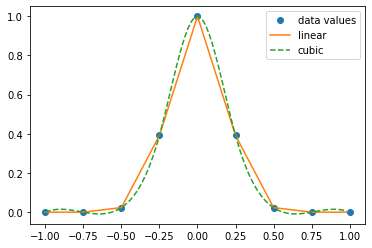

In [ ]:
x = np.array([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
y = np.zeros(9,float)
for i in range(len(x)):
  y[i] = g(x[i])

#function of linear spline
f1 = interp1d(x, y)
#function of cubic spline
f2 = interp1d(x, y, kind = 'cubic')

x_new = np.arange(-1, 1, 0.02)
approx_ly = f1(approx_x)#linear spline
approx_cy = f2(approx_x)#cubic spline


plt.plot(x, y, 'o')
plt.plot(x_new, approx_ly , '-')
plt.plot(x_new, approx_cy , '--')
plt.legend(['data values', 'linear ', 'cubic'], loc='best')
plt.show()


**Task (c-d)**

(**c**) Generate linear splines between the data points $(x_i, \ln(g_i))$. Then, use the exponents of these splines to estimate the values of the function $g$ between the data points $(x_i, g_i)$. 

(**d**) Generate cubic splines between the data points $(x_i, \ln(g_i))$. Then, use the exponents of these splines to estimate the values of the function $g$ between the data points $(x_i, g_i)$. 

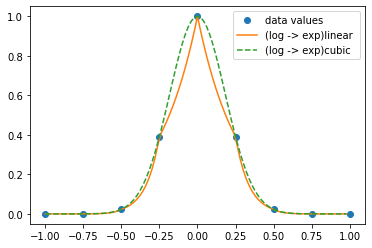

In [ ]:
#Finding the logarith of y
ln_y = np.zeros(9,float)
for i in range(9):
  ln_y[i] = math.log(g(x[i]))

#fucntion of linear spline
f1_2 = interp1d(x, ln_y)
#function of cubic spline
f2_2 = interp1d(x, ln_y, kind='cubic')

#declaring the approximated y values by taking the interpolation functions into a exponent 
approx_ly2 = np.exp(f1_2(x_new))#linear spline
approx_cy2 = np.exp(f2_2(x_new))#cubic spline


plt.plot(x, y, 'o')
plt.plot(x_new, approx_ly2 , '-')
plt.plot(x_new, approx_cy2 , '--')
plt.legend(['data values', '(log -> exp)linear ', '(log -> exp)cubic'], loc='best')
plt.show()

**Task (e)**

(**e**) Plot all the interpolating functions obtained in (**a**)-(**d**) in one frame using the $\tt matplotlib$ library. The behavior of the interpolating functions between the data points must be clearly visualized. In addition, a plot of the original data points $(x_i, g_i)$ must also be provided in the same frame. The information about each plotted function has to be clearly provided in the figure (including graph legends and axis labels).

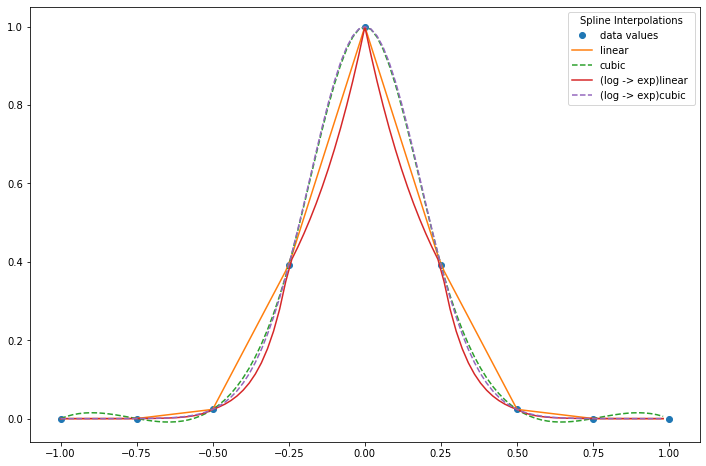

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(x, y, 'o')
plt.plot(x_new, approx_ly , '-')
plt.plot(x_new, approx_cy , '--')
plt.plot(x_new, approx_ly2 , '-')
plt.plot(x_new, approx_cy2 , '--')
plt.legend(['data values','linear ', 'cubic', '(log -> exp)linear ', '(log -> exp)cubic'],title = 'Spline Interpolations', loc='best')
plt.show()

From analyzing the plotted graph, we can say that cubic spline methods are much better than linear spline methods at approximating the main function.In linear methods we can see the way slope changes abruptly and this will negatively affect the accuracy value.

Also it can be noted that cubic spline and (log->exp)cubic spline trends are simillar at the top of the graph but at the bottom there are slight fluctuations for cubic spline method.These fluctuations can have a correlation with the accuracy value.In other words the RMSE value for cubic spline method can be bigger than (log->exp)cubic spline has and this is because of cubic spline fluctuatuins at the bottom.

**Task (f)**

(**f**) Asses which method yields the best accuracy. Hint: you can do that by, e.g., measuring the root mean square deviation of the interpolating functions from the values of the function $g(x)$ in the region between the data points $x_i$.  



First of all we will find the true function values of a special interval of independent values "x_new":


In [ ]:
x_new = np.arange(-1, 1, 0.02)
y_new = np.zeros(100)

for i in range(100):
  y_new[i] = g(x_new[i])

Now we will find the Root Mean Square Deviation for the methods we analyzed before:


In [ ]:
#LINER SPLINE METHOD

MSE = np.square(np.subtract(y_new,approx_ly)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for LINEAR SPLINE:\n")
print(RMSE)

Root Mean Square Error for LINEAR SPLINES:

0.04760726033257722


In [ ]:
#CUBIC SPLINE
MSE = np.square(np.subtract(y_new,approx_cy)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for CUBIC SPLINE:\n")
print(RMSE)

Root Mean Square Error for CUBIC SPLINES:

0.008766794011127451


In [ ]:
#(log -> exp)LINER SPLINE METHOD

MSE = np.square(np.subtract(y_new,approx_ly2)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for (log -> exp)LINEAR SPLINE:\n")
print(RMSE)

Root Mean Square Error for (log -> exp)LINEAR SPLINES:

0.062256862042974925


In [ ]:
#(log -> exp)CUBIC SPLINES
MSE = np.square(np.subtract(y_new,approx_cy2)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error for (log -> exp)CUBIC SPLINE:\n")
print(RMSE)

Root Mean Square Error for (log -> exp)CUBIC SPLINES:

4.2450565679138323e-17


As we predicted in the previous task the (log -> exp)CUBIC SPLINES method yields the best accuracy, which  has the RMSE value - 4.2450565679138323e-17.The (log -> exp)cubic spline method significantly minimized the error of cubic spline method 


**Conclusion**

In this assignment we have generated and analyzed the linear and cubic spline interpolation methods with 2 different approaches.After the calculation of the accuracy value of each method, it was found out that the (log -> exp)cubic spline method has the greatest accuracy value.We have proved that cubic spline method is one of the best ways for estimating the values of the function $g$ between the data points $(x_i, g_i)$ or any other function with a multiple data points. 